# ML Mini Project
# Meet Hemant Vaidya
# 60009220125

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./datasets/GraduateStudentData.csv')

In [4]:
df.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [5]:
df.describe()

,year
count,1121.000000
mean,2017.303301
std,2.492646
min,2013.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Checking for null values

In [6]:
null_values = df.isnull().sum()

print(null_values)

year                         0
university                   0
school                       0
degree                       0
employment_rate_overall      0
employment_rate_ft_perm      0
basic_monthly_mean           0
basic_monthly_median         0
gross_monthly_mean           0
gross_monthly_median         0
gross_mthly_25_percentile    0
gross_mthly_75_percentile    0
dtype: int64


In [7]:
df = df.replace('na', np.nan)

In [8]:
null_values = df.isnull().sum()

print(null_values)

year                          0
university                    0
school                       28
degree                        0
employment_rate_overall      89
employment_rate_ft_perm      89
basic_monthly_mean           89
basic_monthly_median         89
gross_monthly_mean           89
gross_monthly_median         89
gross_mthly_25_percentile    89
gross_mthly_75_percentile    89
dtype: int64


In [9]:
df.dropna(inplace=True)

---

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 0 to 1116
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       1007 non-null   int64 
 1   university                 1007 non-null   object
 2   school                     1007 non-null   object
 3   degree                     1007 non-null   object
 4   employment_rate_overall    1007 non-null   object
 5   employment_rate_ft_perm    1007 non-null   object
 6   basic_monthly_mean         1007 non-null   object
 7   basic_monthly_median       1007 non-null   object
 8   gross_monthly_mean         1007 non-null   object
 9   gross_monthly_median       1007 non-null   object
 10  gross_mthly_25_percentile  1007 non-null   object
 11  gross_mthly_75_percentile  1007 non-null   object
dtypes: int64(1), object(11)
memory usage: 102.3+ KB


#### First we will be changing the data types of the columns related to the employment rate and monthly income to int64 from object

In [11]:
object_to_int = ['employment_rate_overall', 'employment_rate_ft_perm', 'basic_monthly_mean', 'basic_monthly_median', 'gross_monthly_mean', 'gross_monthly_median', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']

for col in object_to_int:
    df[col] = df[col].astype(float)

object_to_str = ['university', 'school', 'degree']

for col in object_to_str:
    df[col] = df[col].astype('string')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 0 to 1116
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1007 non-null   int64  
 1   university                 1007 non-null   string 
 2   school                     1007 non-null   string 
 3   degree                     1007 non-null   string 
 4   employment_rate_overall    1007 non-null   float64
 5   employment_rate_ft_perm    1007 non-null   float64
 6   basic_monthly_mean         1007 non-null   float64
 7   basic_monthly_median       1007 non-null   float64
 8   gross_monthly_mean         1007 non-null   float64
 9   gross_monthly_median       1007 non-null   float64
 10  gross_mthly_25_percentile  1007 non-null   float64
 11  gross_mthly_75_percentile  1007 non-null   float64
dtypes: float64(8), int64(1), string(3)
memory usage: 102.3 KB


---

In [13]:
print(df['university'].unique())

<StringArray>
[       'Nanyang Technological University',
        'National University of Singapore',
         'Singapore Management University',
       'Singapore Institute of Technology',
 'Singapore University of Social Sciences']
Length: 5, dtype: string


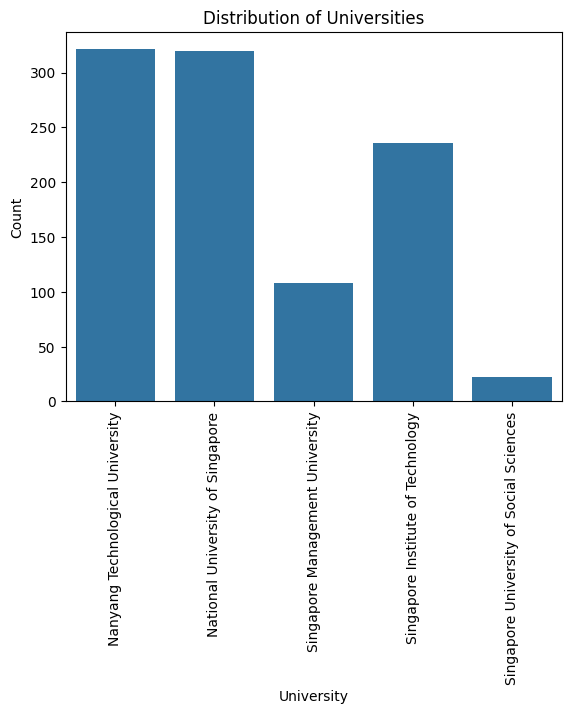

In [14]:
# Visualize the distribution of the university column using a bar plot
sns.countplot(x='university', data=df)

# Set the plot title and axis labels
plt.title('Distribution of Universities')
plt.xticks(rotation=90)
plt.xlabel('University')
plt.ylabel('Count')

# Show the plot
plt.show()

### Therefore we can say there are 6 universities in the dataset. They are:
1. Nanyang Technological University
2. National University of Singapore
3. Singapore Management University
4. Singapore Institute of Technology
5. Singapore University of Technology and Design
6. Singapore University of Social Sciences

---

## Let us check all the schools present in all the universities

## 1. Nanyang Technological University

In [15]:
ntu_schools = df[df['university'] == 'Nanyang Technological University']['school'].unique()
print(ntu_schools)
print(len(ntu_schools))

<StringArray>
['College of Business (Nanyang Business School)',
                        'College of Engineering',
 'College of Humanities, Arts & Social Sciences',
                           'College of Sciences',
         'National Institute of Education (NIE)',
                 'Sports Science and Management',
             'Lee Kong Chian School of Medicine',
                            'College of Science']
Length: 8, dtype: string
8


C:\Users\Meet\AppData\Local\Temp\ipykernel_10092\424867313.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_counts.index, y=school_counts.values, palette='viridis')


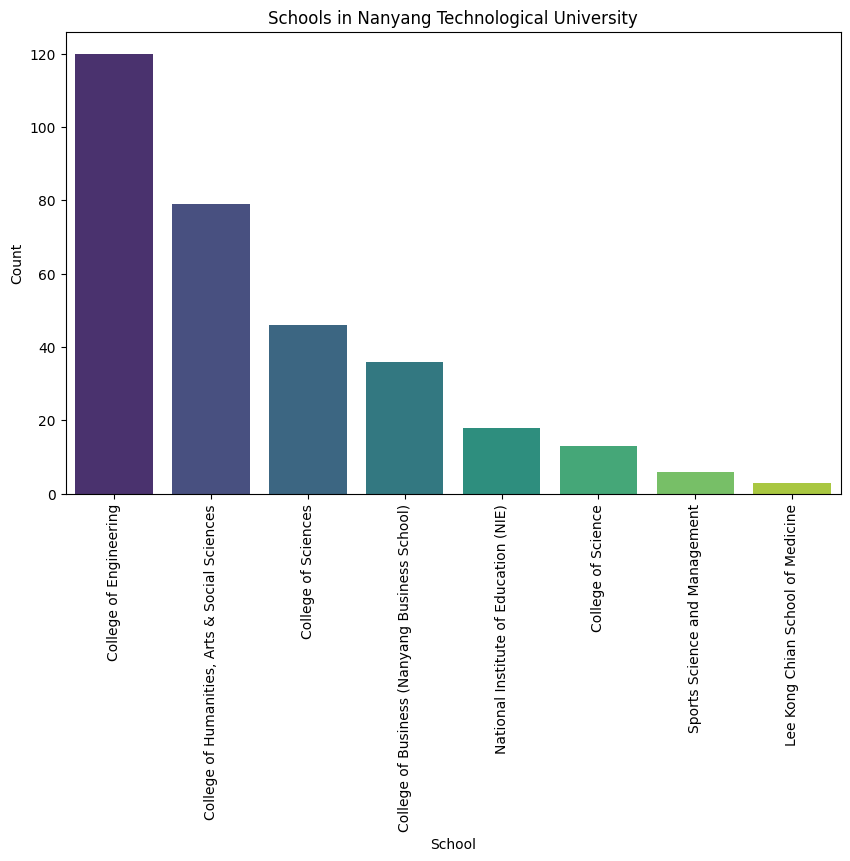

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'university' and 'school' are the column names
ntu_df = df[df['university'] == 'Nanyang Technological University']

# Count the number of occurrences of each school
school_counts = ntu_df['school'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=school_counts.index, y=school_counts.values, palette='viridis')
plt.title('Schools in Nanyang Technological University')
plt.xlabel('School')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

### The schools present in NTU
1. College of Business (Nanyang Business School)
2. College of Engineering
3. College of Humanities, Arts & Social Sciences 
4. College of Sciences
5. National Institute of Education (NIE)
6. Sports Science and Management
7. Lee Kong Chian School of Medicine
8. College of Science

We can see that there is a duplication in "college of science" so we will be renaming the value to "College of Science" as there are significant number of data points

In [17]:
df['school'] = df['school'].replace({'College of Sciences': 'College of Science'})

Visualization after removing duplicates

C:\Users\Meet\AppData\Local\Temp\ipykernel_10092\424867313.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_counts.index, y=school_counts.values, palette='viridis')


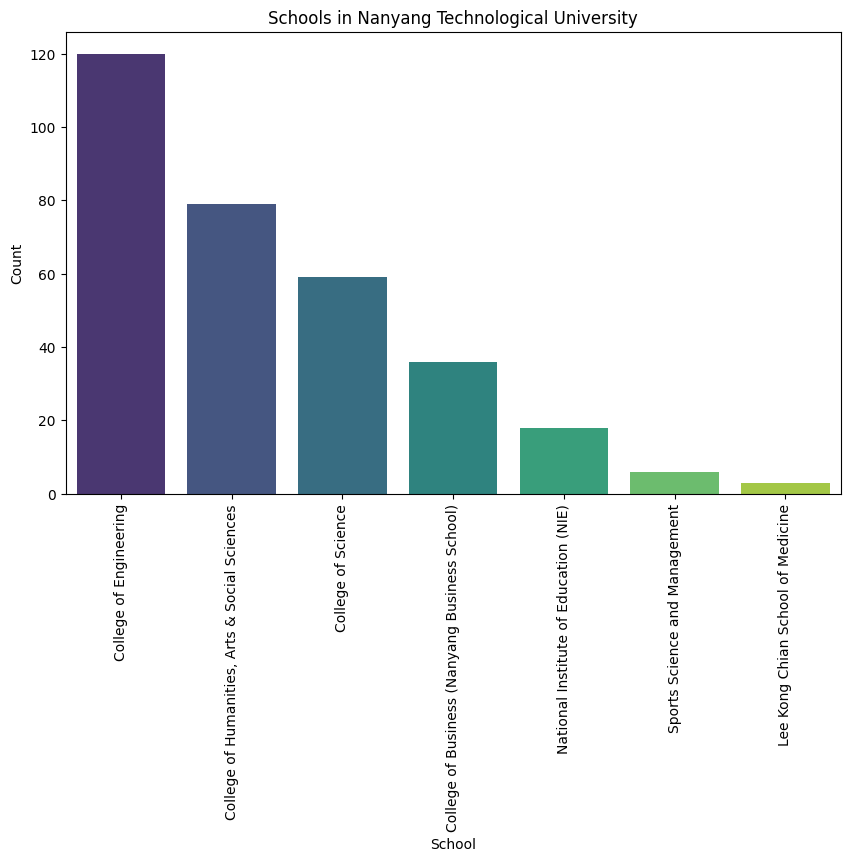

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'university' and 'school' are the column names
ntu_df = df[df['university'] == 'Nanyang Technological University']

# Count the number of occurrences of each school
school_counts = ntu_df['school'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=school_counts.index, y=school_counts.values, palette='viridis')
plt.title('Schools in Nanyang Technological University')
plt.xlabel('School')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

#### Checking for duplicates and redundant data in degrees present in Nanyang Technological University

In [19]:
from difflib import SequenceMatcher

def find_similar_duplicates(string_array):
    duplicates = []
    for i in range(len(string_array)):
        for j in range(i + 1, len(string_array)):
            string1 = string_array[i]
            string2 = string_array[j]
            # Skip strings containing 'Hons'
            if 'Hons' in string1 or 'Hons' in string2:
                continue
            string1_cleaned = ''.join(string1.split()).lower()
            string2_cleaned = ''.join(string2.split()).lower()
            diff_count = sum(c1 != c2 for c1, c2 in zip(string1_cleaned, string2_cleaned))
            if diff_count <= 1:
                similarity_ratio = SequenceMatcher(None, string1, string2).ratio()
                if similarity_ratio > 0.8: 
                    duplicates.append((string1, string2))
    return duplicates

In [20]:
# checking in College of Business (Nanyang Business School)
nanyang_business_school = df[df['school'] == 'College of Business (Nanyang Business School)']['degree'].unique()
print(nanyang_business_school)
print(len(nanyang_business_school))

<StringArray>
[                                                                          'Accountancy and Business',
                                                        'Accountancy (3-yr direct Honours Programme)',
                                                           'Business (3-yr direct Honours Programme)',
                                                                             'Business and Computing',
                                                                                        'Accountancy',
                                                                                           'Business',
                                                                     'Bachelor of Accountancy (Hons)',
                    'Double Degree in Bachelor of Accountancy (Hons) and Bachelor of Business (Hons)',
                                                                        'Bachelor of Business (Hons)',
 'Double Degree in Bachelor of Business (Hons) and Bachelor

Dropping 'Business and Computing ^' as according to the details provided by the data.gov.sg website '^' indicates the sample size is less than 30

In [21]:
df = df[~df['degree'].isin(['Business and Computing ^'])]

Checking in College of Engineering

In [22]:
nanyang_engineering = df[df['school'] == 'College of Engineering']['degree'].unique()
print(nanyang_engineering)
print(len(nanyang_engineering))

<StringArray>
[                                                  'Aerospace Engineering',
                                                          'Bioengineering',
                                   'Chemical and Biomolecular Engineering',
                                                    'Computer Engineering',
                                                       'Civil Engineering',
                                                        'Computer Science',
                                   'Electrical and Electronic Engineering',
                                               'Environmental Engineering',
                                       'Information Engineering and Media',
                                                   'Materials Engineering',
                                                  'Mechanical Engineering',
                                                        'Maritime Studies',
                                   'Chemical And Biomolecular Engineering'

In [23]:
duplicates = find_similar_duplicates(nanyang_engineering)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Chemical and Biomolecular Engineering', 'Chemical And Biomolecular Engineering')
('Electrical and Electronic Engineering', 'Electrical And Electronic Engineering')
('Information Engineering and Media', 'Information Engineering And Media')


In [24]:
df['degree'] = df['degree'].replace({'Chemical And Biomolecular Engineering': 'Chemical and Biomolecular Engineering'})
df['degree'] = df['degree'].replace({'Electrical & Electronic Engineering': 'Electrical and Electronic Engineering'})
df['degree'] = df['degree'].replace({'Information Engineering & Media': 'Information Engineering and Media'})

Checking in College of Humanities, Arts, & Social Sciences

In [25]:
nanyang_humanities = df[df['school'] == 'College of Humanities, Arts, & Social Sciences']['degree'].unique()
print(nanyang_humanities)
print(len(nanyang_humanities))

<StringArray>
[]
Length: 0, dtype: string
0



Checking in College of Science


In [26]:
nanyang_science = df[df['school'] == 'College of Science']['degree'].unique()
print(nanyang_science)
print(len(nanyang_science))

<StringArray>
[                                                            'Biomedical Sciences (Traditional Chinese Medicine) #',
                                                                                              'Biological Sciences',
                                                                                 'Chemistry & Biological Chemistry',
                                                                                             'Mathematical Science',
                                                                                        'Physics / Applied Physics',
                                                                                    'Sports Science and Management',
                                                              'Biomedical Science (Traditional Chinese Medicine) #',
                                                                                          'Mathematics & Economics',
                                                  

In [27]:
duplicates = find_similar_duplicates(nanyang_science)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Mathematical Science', 'Mathematical Sciences')
('Physics / Applied Physics', 'Physics & Applied Physics')
('Biomedical Sciences & Chinese Medicine #', 'Biomedical Sciences & Chinese Medicine # ^')
('Environmental Earth Systems Science ^', 'Environmental Earth Systems Sciences ^')




Checking in National Institute of Education


In [28]:
nanyang_national_institute = df[df['school'] == 'National Institute of Education (NIE)']['degree'].unique()
print(nanyang_national_institute)
print(len(nanyang_national_institute))

<StringArray>
[              'Science (with Education)',
                  'Arts (with Education)',
    'Bachelor of Arts (Hons) (Education)',
 'Bachelor of Science (Hons) (Education)',
                  'Arts (With Education)',
               'Science (With Education)',
             'Science (with Education) ^']
Length: 7, dtype: string
7


In [29]:
duplicates = find_similar_duplicates(nanyang_national_institute)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Science (with Education)', 'Science (With Education)')
('Science (with Education)', 'Science (with Education) ^')
('Arts (with Education)', 'Arts (With Education)')
('Science (With Education)', 'Science (with Education) ^')


In [30]:
df['degree'] = df['degree'].replace({'Science (With Education)': 'Science (with Education)'})
df['degree'] = df['degree'].replace({'Arts (With Education)': 'Arts (with Education)'})



Checking in Sports Science and Management


In [31]:
nanyang_sport = df[df['school'] == 'Sports Science and Management']['degree'].unique()
print(nanyang_sport)
print(len(nanyang_sport))

<StringArray>
[                          'Sports Science and Management',
 'Bachelor of Science (Hons) (Sport Science & Management)',
                            'Sport Science and Management']
Length: 3, dtype: string
3


In [32]:
duplicates = find_similar_duplicates(nanyang_sport)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


In [33]:
df['degree'] = df['degree'].replace({'Sport Science and Management': 'Sports Science and Management'})



Checking in Lee Kong Chian School of Medicine


In [34]:
lee_kong_chian = df[df['school'] == 'Lee Kong Chian School of Medicine']['degree'].unique()
print(lee_kong_chian)
print(len(lee_kong_chian))

<StringArray>
['Medicine #']
Length: 1, dtype: string
1


In [35]:
duplicates = find_similar_duplicates(nanyang_sport)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


## 2. National University of Singapore

In [36]:
nus_schools = df[df['university'] == 'National University of Singapore']['school'].unique()
print(nus_schools)
print(len(nus_schools))

<StringArray>
[  'Faculty of Arts & Social Sciences',                 'NUS Business School',
                 'School of Computing',                'Faculty of Dentistry',
      'School of Design & Environment',              'Faculty of Engineering',
                      'Faculty of Law',              'YLL School of Medicine',
                  'Faculty of Science', 'Yong Siew Toh Conservatory of Music',
        'Multi-Disciplinary Programme',                'Faculty Of Dentistry',
              'Faculty Of Engineering',      'Yong Loo Lin School (Medicine)',
           'YST Conservatory Of Music',                    'Yale-NUS College',
       'Multi-Disciplinary Programmes',        'Multidisciplinary Programmes',
           'YST Conservatory of Music']
Length: 19, dtype: string
19


#### Checking for duplicates entries in the school column in National University of Singapore

We can see some school have duplicated entries so lets find them

In [37]:
lower_nus_schools = [school.lower() for school in nus_schools]

def find_duplicates(arr):
            duplicates = set([x for x in arr if arr.count(x) > 1])
            return list(duplicates)

def check_duplicates(array):
    if len(array) == len(set(array)):
        return False
    else:
        return True
        print(find_duplicates(array))

check_duplicates(lower_nus_schools)
find_duplicates(lower_nus_schools)

['faculty of dentistry', 'yst conservatory of music', 'faculty of engineering']

So we will replacing the names of these schools

In [38]:
df['school'] = df['school'].replace({'Faculty Of Engineering': 'Faculty of Engineering'})
df['school'] = df['school'].replace({'Faculty Of Dentistry': 'Faculty of Dentistry'})
df['school'] = df['school'].replace({'Yong Siew Toh Conservatory of Music': 'YST Conservatory of Music'})
df['school'] = df['school'].replace({'YST Conservatory Of Music': 'YST Conservatory of Music'})
df['school'] = df['school'].replace({'Multi-Disciplinary Programme': 'Multidisciplinary Programmes'})
df['school'] = df['school'].replace({'Yong Loo Lin School (Medicine)': 'YLL School of Medicine'})

The Schools present in National University of Singapore are:
1. Faculty of Arts & Social Sciences
2. NUS Business School
3. School of Computing
4. Faculty of Dentistry
5. School of Design & Environment
6. Faculty of Engineering
7. Faculty of Law
8. YLL School of Medicine
9. Faculty of Science
10. YST Conservatory of Music
11. Multi-Disciplinary Programme
12. Yong Loo Lin School (Medicine)
13. YST Conservatory Of Music
14. Yale-NUS College
15. Multidisciplinary Programmes

#### Checking for duplicates and redundant data in degrees present in National University of Singapore

Checking for duplicates in Faculty of Arts and Social Science

In [39]:
nus_art_science = df[df['school'] == 'Faculty of Arts & Social Sciences']['degree'].unique()
print(nus_art_science)
print(len(nus_art_science))

<StringArray>
['Bachelor of Arts', 'Bachelor of Arts (Hons)', 'Bachelor of Social Sciences']
Length: 3, dtype: string
3


In [40]:
duplicates = find_similar_duplicates(nus_art_science)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


Checking for NUS Business School

In [41]:
nus_business = df[df['school'] == 'NUS Business School']['degree'].unique()
print(nus_business)
print(len(nus_business))

<StringArray>
[                     'Bachelor of Business Administration',
               'Bachelor of Business Administration (Hons)',
        'Bachelor of Business Administration (Accountancy)',
 'Bachelor of Business Administration (Accountancy) (Hons)',
      'Bachelor of Business Administration (Accountancy) ^',
                    'Bachelor of Business Administration ^']
Length: 6, dtype: string
6


Dropping the degrees with sample size smaller than 30 (refered the documentation provided by the data provider)

In [42]:
df = df[~df['degree'].isin(['Bachelor of Business Administration (Accountancy) ^'])]
df = df[~df['degree'].isin(['Bachelor of Business Administration ^'])]

In [43]:
duplicates = find_similar_duplicates(nus_business)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Business Administration', 'Bachelor of Business Administration (Accountancy)')
('Bachelor of Business Administration', 'Bachelor of Business Administration (Accountancy) ^')
('Bachelor of Business Administration', 'Bachelor of Business Administration ^')
('Bachelor of Business Administration (Accountancy)', 'Bachelor of Business Administration (Accountancy) ^')
('Bachelor of Business Administration (Accountancy)', 'Bachelor of Business Administration ^')
('Bachelor of Business Administration (Accountancy) ^', 'Bachelor of Business Administration ^')


Checking for School of Computing

In [44]:
nus_computing = df[df['school'] == 'School of Computing']['degree'].unique()
print(nus_computing)
print(len(nus_computing))

<StringArray>
['Bachelor of Computing (Communications and Media)',
         'Bachelor of Computing (Computer Science)',
      'Bachelor of Computing (Electronic Commerce)',
      'Bachelor of Computing (Information Systems)',
         'Bachelor of Science (Business Analytics)',
   'Bachelor of Computing (Information Security) ^']
Length: 6, dtype: string
6


Dropping the degrees with sample size smaller than 30 (refered the documentation provided by the data provider)

In [45]:
df = df[~df['degree'].isin(['Bachelor of Computing (Information Security) ^'])]

In [46]:
duplicates = find_similar_duplicates(nus_computing)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


Checking for Faculty of Dentistry

In [47]:
nus_denistry = df[df['school'] == 'Faculty of Dentistry']['degree'].unique()
print(nus_denistry)
print(len(nus_denistry))

<StringArray>
['Bachelor of Dental Surgery']
Length: 1, dtype: string
1


In [48]:
duplicates = find_similar_duplicates(nus_denistry)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


Checking for School of Design & Environment

In [49]:
nus_design = df[df['school'] == 'School of Design & Environment']['degree'].unique()
print(nus_design)
print(len(nus_design))

<StringArray>
[                   'Bachelor of Arts (Industrial Design)',
 'Bachelor of Science (Project and Facilities Management)',
                       'Bachelor of Science (Real Estate)',
                       'Bachelor of Arts (Architecture) #',
                  'Bachelor of Arts (Industrial Design) ^',
                         'Bachelor of Arts (Architecture)']
Length: 6, dtype: string
6


Dropping the degrees with sample size smaller than 30 (refered the documentation provided by the data provider) and renaming the duplicates

In [50]:
df = df[~df['degree'].isin(['Bachelor of Arts (Industrial Design) ^'])]
df['degree'] = df['degree'].replace({'Bachelor of Arts (Architecture) #': 'Bachelor of Arts (Architecture)'})

In [51]:
duplicates = find_similar_duplicates(nus_design)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Arts (Industrial Design)', 'Bachelor of Arts (Industrial Design) ^')
('Bachelor of Arts (Architecture) #', 'Bachelor of Arts (Architecture)')


Checking for Faculty of Engineering

In [52]:
nus_engineering = df[df['school'] == 'Faculty of Engineering']['degree'].unique()
print(nus_engineering)
print(len(nus_engineering))

<StringArray>
[                    'Bachelor of Engineering (Bioengineering)',
               'Bachelor of Engineering (Chemical Engineering)',
                  'Bachelor of Engineering (Civil Engineering)',
               'Bachelor of Engineering (Computer Engineering)',
             'Bachelor of Engineering (Electrical Engineering)',
                'Bachelor of Engineering (Engineering Science)',
          'Bachelor of Engineering (Environmental Engineering)',
 'Bachelor of Engineering (Industrial and Systems Engineering)',
  'Bachelor of Engineering (Materials Science and Engineering)',
             'Bachelor of Engineering (Mechanical Engineering)',
          'Bachelor of Engineering (Biomedical Engineering) ^^',
             'Bachelor of Engineering (Biomedical Engineering)',
  'Bachelor of Engineering (Materials Science And Engineering)',
              'Bachelor of Engineering (Engineering Science) ^']
Length: 14, dtype: string
14


Dropping and renaming the degrees with sample size smaller than 30 (refered the documentation provided by the data provider)

In [53]:
duplicates = find_similar_duplicates(nus_engineering)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Engineering (Engineering Science)', 'Bachelor of Engineering (Engineering Science) ^')
('Bachelor of Engineering (Materials Science and Engineering)', 'Bachelor of Engineering (Materials Science And Engineering)')
('Bachelor of Engineering (Biomedical Engineering) ^^', 'Bachelor of Engineering (Biomedical Engineering)')


In [54]:
df['degree'] = df['degree'].replace({'Bachelor of Engineering (Biomedical Engineering) ^^': 'Bachelor of Engineering (Biomedical Engineering)'})
df['degree'] = df['degree'].replace({'Bachelor of Engineering (Engineering Science) ^': 'Bachelor of Engineering (Engineering Science)'})
df['degree'] = df['degree'].replace({'Bachelor of Engineering (Materials Science And Engineering)': 'Bachelor of Engineering (Materials Science and Engineering)'})

Checking for Faculty of Law

In [55]:
nus_law = df[df['school'] == 'Faculty of Law']['degree'].unique()
print(nus_law)
print(len(nus_law))

<StringArray>
[  'Bachelor of Laws (LLB) (Hons) #', 'Bachelor of Laws (L.L.B) (Hons) #',
                'Bachelor of Laws #']
Length: 3, dtype: string
3


Dropping and renaming the degrees with sample size smaller than 30 (refered the documentation provided by the data provider)

In [56]:
df['degree'] = df['degree'].replace({'Bachelor of Laws (LLB) (Hons) #': 'Bachelor of Laws (LLB) (Hons)'})
df['degree'] = df['degree'].replace({'Bachelor of Laws (L.L.B) (Hons) #': 'Bachelor of Laws (LLB) (Hons)'})
df['degree'] = df['degree'].replace({'Bachelor of Laws #': 'Bachelor of Laws'})

In [57]:
duplicates = find_similar_duplicates(nus_law)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


Checking for YLL School of Medicine

In [58]:
nus_medicine = df[df['school'] == 'YLL School of Medicine']['degree'].unique()
print(nus_medicine)
print(len(nus_medicine))

<StringArray>
['Bachelor of Medicine and Bachelor of Surgery (MBBS) #',
                         'Bachelor of Science (Nursing)',
                  'Bachelor of Science (Nursing) (Hons)',
        'Bachelor of Medicine and Bachelor of Surgery #',
        'Bachelor of Medicine and Bachelor Of Surgery #',
        'Bachelor of Medicine And Bachelor Of Surgery #']
Length: 6, dtype: string
6


In [59]:
duplicates = find_similar_duplicates(nus_medicine)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Medicine and Bachelor of Surgery (MBBS) #', 'Bachelor of Medicine and Bachelor of Surgery #')
('Bachelor of Medicine and Bachelor of Surgery (MBBS) #', 'Bachelor of Medicine and Bachelor Of Surgery #')
('Bachelor of Medicine and Bachelor of Surgery (MBBS) #', 'Bachelor of Medicine And Bachelor Of Surgery #')
('Bachelor of Medicine and Bachelor of Surgery #', 'Bachelor of Medicine and Bachelor Of Surgery #')
('Bachelor of Medicine and Bachelor of Surgery #', 'Bachelor of Medicine And Bachelor Of Surgery #')
('Bachelor of Medicine and Bachelor Of Surgery #', 'Bachelor of Medicine And Bachelor Of Surgery #')


Dropping and renaming the degrees with sample size smaller than 30 (refered the documentation provided by the data provider)

In [60]:
df['degree'] = df['degree'].replace({'Bachelor of Medicine and Bachelor of Surgery (MBBS) #': 'Bachelor of Medicine and Bachelor of Surgery (MBBS)'})
df['degree'] = df['degree'].replace({'Bachelor of Medicine and Bachelor of Surgery #': 'Bachelor of Medicine and Bachelor of Surgery (MBBS)'})
df['degree'] = df['degree'].replace({'Bachelor of Medicine and Bachelor Of Surgery #': 'Bachelor of Medicine and Bachelor of Surgery (MBBS)'})
df['degree'] = df['degree'].replace({'Bachelor of Medicine And Bachelor Of Surgery #': 'Bachelor of Medicine and Bachelor of Surgery (MBBS)'})

Checking for Faculty of Science

In [61]:
nus_science = df[df['school'] == 'Faculty of Science']['degree'].unique()
print(nus_science)
print(len(nus_science))

<StringArray>
[                'Bachelor of Applied Science (Hons)',
                                'Bachelor of Science',
                         'Bachelor of Science (Hons)',
            'Bachelor of Science (Pharmacy) (Hons) #',
             'Bachelor of Science (Pharmacy)(Hons) #',
                   'Bachelor of Science (Pharmacy) #',
                       'Bachelor of Science (Hons) ^',
      'Bachelor of Science (Computational Biology) ^',
 'Bachelor of Science (Data Science and Analytics) ^',
   'Bachelor of Science (Data Science and Analytics)']
Length: 10, dtype: string
10


In [62]:
duplicates = find_similar_duplicates(nus_science)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Science (Data Science and Analytics) ^', 'Bachelor of Science (Data Science and Analytics)')


Dropping and renaming the degrees with sample size smaller than 30 (refered the documentation provided by the data provider)


In [63]:
df['degree'] = df['degree'].replace({'Bachelor of Science (Pharmacy) (Hons) #': 'Bachelor of Science (Pharmacy) (Hons)'})
df['degree'] = df['degree'].replace({'Bachelor of Science (Pharmacy)(Hons) #': 'Bachelor of Science (Pharmacy) (Hons)'})
df['degree'] = df['degree'].replace({'Bachelor of Science (Pharmacy) #': 'Bachelor of Science (Pharmacy)'})
df['degree'] = df['degree'].replace({'Bachelor of Science (Pharmacy) #': 'Bachelor of Science (Pharmacy)'})

df = df[~df['degree'].isin(['Bachelor of Science (Hons) ^'])]
df = df[~df['degree'].isin(['Bachelor of Science (Computational Biology) ^'])]
df = df[~df['degree'].isin(['Bachelor of Science (Data Science and Analytics) ^'])]

Checking for YST Conservatory of Music

In [64]:
nus_music = df[df['school'] == 'YST Conservatory of Music']['degree'].unique()
print(nus_music)
print(len(nus_music))

<StringArray>
['Bachelor of Music', 'Bachelor of Music ^']
Length: 2, dtype: string
2


Dropping and renaming the degrees with sample size smaller than 30 (refered the documentation provided by the data provider)


In [65]:
df = df[~df['degree'].isin(['Bachelor of Music ^'])]

Checking for Multidisciplinary Programmes

In [66]:
nus_multi = df[df['school'] == 'Multidisciplinary Programmes']['degree'].unique()
print(nus_multi)
print(len(nus_multi))

<StringArray>
['Bachelor of Environmental Studies', 'Bachelor of Engineering (Computer Engineering)']
Length: 2, dtype: string
2


Checking for Yale-NUS College

In [67]:
nus_yale = df[df['school'] == 'Yale-NUS College']['degree'].unique()
print(nus_yale)
print(len(nus_yale))

<StringArray>
[     'Bachelor of Arts with Honours',   'Bachelor of Science with Honours',
 'Bachelor of Science with Honours ^']
Length: 3, dtype: string
3


Dropping and renaming the degrees with sample size smaller than 30 (refered the documentation provided by the data provider)

In [68]:
df = df[~df['degree'].isin(['Bachelor of Science with Honours ^'])]

## 3. Singapore Management University

In [69]:
smu_schools = df[df['university'] == 'Singapore Management University']['school'].unique()
print(smu_schools)
print(len(smu_schools))

<StringArray>
[        'School of Accountancy (4-years programme) *',
            'School of Business (4-years programme) *',
           'School of Economics (4-years programme) *',
 'School of Information Systems (4-years programme) *',
     'School of Social Sciences (4-years programme) *',
                 'School of Law (4-years programme) *',
          'School of Accountancy (4-year programme) *',
             'School of Business (4-year programme) *',
            'School of Economics (4-year programme) *',
  'School of Information Systems (4-year programme) *',
      'School of Social Sciences (4-year programme) *',
                  'School of Law (4-year programme) *']
Length: 12, dtype: string
12


In [70]:
duplicates = find_similar_duplicates(smu_schools)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


From the printed we can notice that half the listed values of school are duplicates so we will be renaming the schools to reduce the redundancy

In [71]:
df['school'] = df['school'].replace({'School of Accountancy (4-years programme) *': 'School of Accountancy (4-year programme)'})
df['school'] = df['school'].replace({'School of Business (4-years programme) *': 'School of Business (4-year programme)'})
df['school'] = df['school'].replace({'School of Economics (4-years programme) *': 'School of Economics (4-year programme)'})
df['school'] = df['school'].replace({'School of Information Systems (4-years programme) *': 'School of Information Systems (4-year programme)'})
df['school'] = df['school'].replace({'School of Social Sciences (4-years programme) *': 'School of Social Sciences (4-year programme)'})
df['school'] = df['school'].replace({'School of Law (4-years programme) *': 'School of Law (4-year programme)'})

df['school'] = df['school'].replace({'School of Accountancy (4-year programme) *': 'School of Accountancy (4-year programme)'})
df['school'] = df['school'].replace({'School of Business (4-year programme) *': 'School of Business (4-year programme)'})
df['school'] = df['school'].replace({'School of Economics (4-year programme) *': 'School of Economics (4-year programme)'})
df['school'] = df['school'].replace({'School of Information Systems (4-year programme) *': 'School of Business (4-year programme)'})
df['school'] = df['school'].replace({'School of Social Sciences (4-year programme) *': 'School of Social Sciences (4-year programme)'})
df['school'] = df['school'].replace({'School of Law (4-year programme) *': 'School of Law (4-year programme)'})

Checking for School of Accountancy (4-year programme)

In [72]:
smu_accountancy = df[df['school'] == 'School of Accountancy (4-year programme)']['degree'].unique()
print(smu_accountancy)
print(len(smu_accountancy))

<StringArray>
[                    'Accountancy (4-years programme)',
 'Accountancy (4-years programme) Cum Laude and above',
                      'Accountancy (4-year programme)',
  'Accountancy (4-year programme) Cum Laude and above',
                                         'Accountancy',
                     'Accountancy Cum Laude and above',
                   'Accountancy (Cum Laude and above)']
Length: 7, dtype: string
7


In [73]:
duplicates = find_similar_duplicates(smu_accountancy)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


In [74]:
df['degree'] = df['degree'].replace({'Accountancy (4-year programme) Cum Laude and above': 'Accountancy (4-years programme) (Hons)'})
df['degree'] = df['degree'].replace({'Accountancy (4-years programme) Cum Laude and above': 'Accountancy (4-years programme) (Hons)'})
df['degree'] = df['degree'].replace({'Accountancy (4-year programme)': 'Accountancy (4-years programme)'})
df['degree'] = df['degree'].replace({'Accountancy Cum Laude and above': 'Accountancy (Hons)'})
df['degree'] = df['degree'].replace({'Accountancy (Cum Laude and above)': 'Accountancy (Hons)'})

Checking for School of Business (4-year programme)

In [75]:
smu_business = df[df['school'] == 'School of Business (4-year programme)']['degree'].unique()
print(smu_business)
print(len(smu_business))

<StringArray>
[                              'Business Management (4-years programme)',
           'Business Management (4-years programme) Cum Laude and above',
                                'Business Management (4-year programme)',
            'Business Management (4-year programme) Cum Laude and above',
                     'Information Systems Management (4-year programme)',
 'Information Systems Management (4-year programme) Cum Laude and above',
                                                   'Business Management',
                               'Business Management Cum Laude and above',
                                        'Information Systems Management',
                    'Information Systems Management Cum Laude and above',
                             'Business Management (Cum Laude and above)',
                                                   'Information Systems',
                             'Information Systems (Cum Laude and above)']
Length: 13, dtype: strin

In [76]:
duplicates = find_similar_duplicates(smu_business)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Information Systems Management (4-year programme)', 'Information Systems Management (4-year programme) Cum Laude and above')


In [77]:
df['degree'] = df['degree'].replace({'Business Management (4-year programme) Cum Laude and above': 'Business Management (4-years programme) Cum Laude and above'})
df['degree'] = df['degree'].replace({'Business Management (4-years programme) Cum Laude and above': 'Business Management (4-years programme) (Hons)'})
df['degree'] = df['degree'].replace({'Business Management (4-year programme)': 'Business Management (4-years programme)'})
df['degree'] = df['degree'].replace({'Information Systems Management (4-year programme) Cum Laude and above': 'Information Systems Management (4-year programme) (Hons)'})
df['degree'] = df['degree'].replace({'Business Management Cum Laude and above': 'Business Management (Hons)'})
df['degree'] = df['degree'].replace({'Information Systems Management Cum Laude and above': 'Information Systems Management (Hons)'})
df['degree'] = df['degree'].replace({'Business Management (Cum Laude and above)': 'Business Management (Hons)'})
df['degree'] = df['degree'].replace({'Information Systems (Cum Laude and above)': 'Information Systems (Hons)'})

Checking for School of Economics (4-year programme)

In [78]:
smu_economics = df[df['school'] == 'School of Economics (4-year programme)']['degree'].unique()
print(smu_economics)
print(len(smu_economics))

<StringArray>
[                    'Economics (4-years programme)',
 'Economics (4-years programme) Cum Laude and above',
                      'Economics (4-year programme)',
  'Economics (4-year programme) Cum Laude and above',
                                         'Economics',
                     'Economics Cum Laude and above',
                   'Economics (Cum Laude and above)']
Length: 7, dtype: string
7


In [79]:
duplicates = find_similar_duplicates(smu_economics)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


In [80]:
df['degree'] = df['degree'].replace({'Economics (4-years programme) Cum Laude and above': 'Economics (4-years programme) (Hons)'})
df['degree'] = df['degree'].replace({'Economics (4-year programme) Cum Laude and above': 'Economics (4-years programme) (Hons)'})
df['degree'] = df['degree'].replace({'Economics (4-year programme)': 'Economics (4-years programme)'})
df['degree'] = df['degree'].replace({'Economics (Cum Laude and above)': 'Economics (Hons)'})
df['degree'] = df['degree'].replace({'Economics Cum Laude and above': 'Economics (Hons)'})
df['degree'] = df['degree'].replace({'Economics': 'Economics (4-years programme)'})

Checking for School of Information Systems (4-year programme)

In [81]:
smu_infosystem = df[df['school'] == 'School of Information Systems (4-year programme)']['degree'].unique()
print(smu_infosystem)
print(len(smu_infosystem))

<StringArray>
[                    'Information Systems Management (4-years programme)',
 'Information Systems Management (4-years programme) Cum Laude and above',
                                         'Information Systems Management',
                                  'Information Systems Management (Hons)']
Length: 4, dtype: string
4


In [82]:
duplicates = find_similar_duplicates(smu_infosystem)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Information Systems Management (4-years programme)', 'Information Systems Management (4-years programme) Cum Laude and above')


In [83]:
df['degree'] = df['degree'].replace({'Information Systems Management (4-years programme) Cum Laude and above' : 'Information Systems Management (4-years programme) (Hons)'})

Checking for School of Social Sciences (4-year programme)

In [84]:
smu_social = df[df['school'] == 'School of Social Sciences (4-year programme)']['degree'].unique()
print(smu_social)
print(len(smu_social))

<StringArray>
[                    'Social Sciences (4-years programme)',
 'Social Sciences (4-years programme) Cum Laude and above',
                      'Social Sciences (4-year programme)',
  'Social Sciences (4-year programme) Cum Laude and above',
                                         'Social Sciences',
                     'Social Sciences Cum Laude and above',
                   'Social Sciences (Cum Laude and above)']
Length: 7, dtype: string
7


In [85]:
duplicates = find_similar_duplicates(smu_social)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

No similar duplicates found.


In [86]:
df['degree'] = df['degree'].replace({'Social Sciences (4-years programme) Cum Laude and above' : 'Social Sciences (4-years programme) (Hons)'})
df['degree'] = df['degree'].replace({'Social Sciences (4-year programme) Cum Laude and above' : 'Social Sciences (4-years programme) (Hons)'})
df['degree'] = df['degree'].replace({'Social Sciences (4-year programme)' : 'Social Sciences (4-years programme)'})
df['degree'] = df['degree'].replace({'Social Sciences (Cum Laude and above)' : 'Social Sciences (Hons)'})
df['degree'] = df['degree'].replace({'Social Sciences Cum Laude and above' : 'Social Sciences (Hons)'})

Checking for School of Law (4-year programme)

In [87]:
smu_law = df[df['school'] == 'School of Social Sciences (4-year programme)']['degree'].unique()
print(smu_law)
print(len(smu_law))

<StringArray>
[       'Social Sciences (4-years programme)',
 'Social Sciences (4-years programme) (Hons)',
                            'Social Sciences',
                     'Social Sciences (Hons)']
Length: 4, dtype: string
4


## 4. Singapore Institute of Technology

In [88]:
sit_schools = df[df['university'] == 'Singapore Institute of Technology']['school'].unique()
print(sit_schools)
print(len(sit_schools))

<StringArray>
[                                                   'DigiPen Institute of Technology',
                                                          'The Glasgow School of Art',
                                                               'Newcastle University',
                                                     'Technische Universit�t M�nchen',
                                                  'The Culinary Institute of America',
                                                             'Trinity College Dublin',
                                                              'University of Glasgow',
                                                           'University of Manchester',
                                                    'University of Nevada, Las Vegas',
                                                                   'Wheelock College',
                          'Singapore Institute of Technology -Trinity College Dublin',
  'Trinity College Dublin / S

In [89]:
df['school'] = df['school'].replace({'Singapore Institute of Technology -Trinity College Dublin': 'Trinity College Dublin'})
df['school'] = df['school'].replace({'Trinity College Dublin / Singapore Institute of Technology-Trinity College Dublin': 'Trinity College Dublin'})
df['school'] = df['school'].replace({'Singapore Institute of Technology -Trinity College Dublin / Trinity College Dublin': 'Trinity College Dublin'})
df['school'] = df['school'].replace({'SIT-Trinity College Dublin / Trinity College Dublin': 'Trinity College Dublin'})
df['school'] = df['school'].replace({'SIT / SIT-Trinity College Dublin / Trinity College Dublin': 'Trinity College Dublin'})
df['school'] = df['school'].replace({'SIT-Trinity College Dublin': 'Trinity College Dublin'})
df['school'] = df['school'].replace({'Singapore Institute of Technology (SIT)': 'Singapore Institute of Technology'})
df['school'] = df['school'].replace({'SIT- Massey University': 'SIT-Massey University'})
df['school'] = df['school'].replace({'SIT- DigiPen Institute of Technology': 'SIT-DigiPen Institute of Technology'})
df['school'] = df['school'].replace({'SIT- Newcastle University': 'SIT-Newcastle University'})
df['school'] = df['school'].replace({'DigiPen Institute of Technology': 'SIT-DigiPen Institute of Technology'})
df['school'] = df['school'].replace({'Technische Universit�t M�nchen': 'Technische University Munich'})
df['school'] = df['school'].replace({'University of Glasgow': 'SIT-University of Glasgow'})
df['school'] = df['school'].replace({'Newcastle University': 'SIT-Newcastle University'})

Checking for SIT-DigiPen Institute of Technology

In [90]:
sit_digipen = df[df['school'] == 'SIT-DigiPen Institute of Technology']['degree'].unique()
print(sit_digipen)
print(len(sit_digipen))

<StringArray>
[                                                        'Bachelor of Arts in Game Design',
                                       'Bachelor of Fine Arts in Digital Arts & Animation',
                                   'Bachelor of Science in Computer Science & Game Design',
             'Bachelor of Science in Computer Science in Real-Time Interactive Simulation',
                                                       'Bachelor of Arts in Game Design ^',
                                     'Bachelor of Fine Arts in Digital Arts & Animation ^',
                                 'Bachelor of Science in Computer Science & Game Design ^',
                                      'Bachelor of Fine Arts in Digital Art and Animation',
                               'Bachelor of Science in Computer Science and Game Design ^',
            'Bachelor of Engineering in Systems Engineering (ElectroMechanical Systems) ^',
                                 'Bachelor of Science in Computer 

In [91]:
duplicates = find_similar_duplicates(sit_digipen)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Arts in Game Design', 'Bachelor of Arts in Game Design ^')
('Bachelor of Fine Arts in Digital Arts & Animation', 'Bachelor of Fine Arts in Digital Arts & Animation ^')
('Bachelor of Science in Computer Science & Game Design', 'Bachelor of Science in Computer Science & Game Design ^')
('Bachelor of Science in Computer Science and Game Design ^', 'Bachelor of Science in Computer Science and Game Design')


Dropped all the values according to documentation as it stated that values with '^' are of less reliance due to small sample size

In [92]:
to_delete = ['Bachelor of Science in Computer Science & Game Design ^', 'Bachelor of Arts in Game Design ^', 'Bachelor of Fine Arts in Digital Arts & Animation ^', 'Bachelor of Science in Computer Science and Game Design ^', 'Bachelor of Engineering in Systems Engineering (ElectroMechanical Systems) ^', 'Bachelor of Science in Computer Science and Game Design',]

for delete in to_delete:
    df = df[~df['degree'].isin([delete])] 

Renamed the redundant and duplicate values in the dataset

In [93]:
df['degree'] = df['degree'].replace({'Bachelor of Fine Arts in Digital Arts & Animation' : 'Bachelor of Fine Arts in Digital Arts and Animation'})
df['degree'] = df['degree'].replace({'Bachelor of Fine Arts in Digital Art and Animation' : 'Bachelor of Fine Arts in Digital Arts and Animation'})
df['degree'] = df['degree'].replace({'Bachelor of Science in Computer Science & Game Design' : 'Bachelor of Science in Computer Science and Game Design'})

Checking for The Glasgow School of Art

In [94]:
sit_glasgow = df[df['school'] == 'The Glasgow School of Art']['degree'].unique()
print(sit_glasgow)
print(len(sit_glasgow))

<StringArray>
['Bachelor of Arts with Honours in Communication Design', 'Bachelor of Arts with Honours in Interior Design']
Length: 2, dtype: string
2


Checking for SIT-Newcastle University

In [95]:
sit_newcastle = df[df['school'] == 'SIT-Newcastle University']['degree'].unique()
print(sit_newcastle)
print(len(sit_newcastle))

<StringArray>
[                             'Bachelor of Engineering with Honours in Chemical Engineering',
                                'Bachelor of Engineering with Honours in Marine Engineering',
     'Bachelor of Engineering with Honours in Mechanical Design & Manufacturing Engineering',
                                'Bachelor of Engineering with Honours in Naval Architecture',
                              'Bachelor of Engineering with Honours in Offshore Engineering',
                                'Bachelor of Science with Honours in Food & Human Nutrition',
                      'Bachelor of Engineering with Honours in Electrical Power Engineering',
                              'Bachelor of Engineering with Honours in Marine Engineering ^',
                              'Bachelor of Engineering with Honours in Naval Architecture ^',
                            'Bachelor of Engineering with Honours in Offshore Engineering ^',
   'Bachelor of Engineering with Honours in Me

In [96]:
to_delete = ['Bachelor of Engineering with Honours in Marine Engineering ^', 'Bachelor of Engineering with Honours in Naval Architecture ^', 'Bachelor of Engineering with Honours in Offshore Engineering ^', 'Bachelor of Engineering with Honours in Electrical Power Engineering ^', 'Bachelor of Engineering with Honours in Mechanical Design and Manufacturing Engineering ^']

for delete in to_delete:
    df = df[~df['degree'].isin([delete])] 

In [97]:
duplicates = find_similar_duplicates(sit_newcastle)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Engineering with Honours in Marine Engineering', 'Bachelor of Engineering with Honours in Marine Engineering ^')
('Bachelor of Engineering with Honours in Naval Architecture', 'Bachelor of Engineering with Honours in Naval Architecture ^')
('Bachelor of Engineering with Honours in Offshore Engineering', 'Bachelor of Engineering with Honours in Offshore Engineering ^')
('Bachelor of Engineering with Honours in Electrical Power Engineering', 'Bachelor of Engineering with Honours in Electrical Power Engineering ^')
('Bachelor of Engineering with Honours in Mechanical Design and Manufacturing Engineering', 'Bachelor of Engineering with Honours in Mechanical Design and Manufacturing Engineering ^')


Checking for Technische University Munich

In [98]:
sit_technische = df[df['school'] == 'Technische University Munich']['degree'].unique()
print(sit_technische)
print(len(sit_technische))

<StringArray>
[                             'Bachelor of Science in Chemical Engineering',
   'Bachelor of Science in Electrical Engineering & Information Technology',
 'Bachelor of Science in Electrical Engineering & Information Technology ^']
Length: 3, dtype: string
3


In [99]:
df = df[~df['degree'].isin(['Bachelor of Science in Electrical Engineering & Information Technology ^'])]

Checking for The Culinary Institute of America

In [100]:
sit_cia = df[df['school'] == 'The Culinary Institute of America']['degree'].unique()
print(sit_cia)
print(len(sit_cia))

<StringArray>
[     'Bachelor of Professional Studies in Culinary Arts Management',
   'Bachelor of Business Administration in Food Business Management',
 'Bachelor of Business Administration in Food Business Management ^']
Length: 3, dtype: string
3


In [101]:
df = df[~df['degree'].isin(['Bachelor of Business Administration in Food Business Management ^'])]

Checking for Trinity College Dublin

In [102]:
sit_trinity = df[df['school'] == 'Trinity College Dublin']['degree'].unique()
print(sit_trinity)
print(len(sit_trinity))

<StringArray>
[    'Bachelor in Science (Occupational Therapy)',
            'Bachelor in Science (Physiotherapy)',
   'Bachelor in Science (Diagnostic Radiography)',
 'Bachelor in Science (Diagnostic Radiography) ^',
      'Bachelor in Science (Radiation Therapy) ^',
            'Bachelor of Science (Physiotherapy)']
Length: 6, dtype: string
6


In [103]:
df = df[~df['degree'].isin(['Bachelor in Science (Diagnostic Radiography) ^'])]
df = df[~df['degree'].isin(['Bachelor in Science (Radiation Therapy) ^'])]

df['degree'] = df['degree'].replace({'Bachelor in Science (Physiotherapy)' : 'Bachelor of Science (Physiotherapy)'})
df['degree'] = df['degree'].replace({'Bachelor in Science (Occupational Therapy)' : 'Bachelor of Science (Occupational Therapy)'})
df['degree'] = df['degree'].replace({'Bachelor in Science (Diagnostic Radiography)' : 'Bachelor of Science (Diagnostic Radiography)'})

Checking for SIT-University of Glasgow

In [104]:
sit_glasgow_uni = df[df['school'] == 'SIT-University of Glasgow']['degree'].unique()
print(sit_glasgow_uni)
print(len(sit_glasgow_uni))

<StringArray>
[     'Bachelor of Engineering with Honours in Aeronautical Engineering',
             'Bachelor of Engineering with Honours in Aerospace Systems',
 'Bachelor of Engineering with Honours in Mechanical Design Engineering',
                  'Bachelor of Engineering with Honours in Mechatronics',
                 'Bachelor of Science with Honours in Computing Science',
                           'Bachelor of Science with Honours in Nursing',
             'Bachelor of Engineering with Honours in Civil Engineering',
           'Bachelor of Engineering with Honours in Aerospace Systems ^']
Length: 8, dtype: string
8


In [105]:
duplicates = find_similar_duplicates(sit_glasgow_uni)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Engineering with Honours in Aerospace Systems', 'Bachelor of Engineering with Honours in Aerospace Systems ^')


In [106]:
df = df[~df['degree'].isin(['Bachelor of Engineering with Honours in Aerospace Systems ^'])]

Checking for University of Manchester

In [107]:
sit_manchester = df[df['school'] == 'University of Manchester']['degree'].unique()
print(sit_manchester)
print(len(sit_manchester))

<StringArray>
['Bachelor of Science with Honours in Nursing Practice']
Length: 1, dtype: string
1


Checking for University of Nevada, Las Vegas

In [108]:
sit_nevada = df[df['school'] == 'University of Nevada, Las Vegas']['degree'].unique()
print(sit_nevada)
print(len(sit_nevada))

<StringArray>
['Bachelor of Science (Major in Hospitality Management)']
Length: 1, dtype: string
1


Checking for Wheelock College

In [109]:
sit_wheelock = df[df['school'] == 'Wheelock College']['degree'].unique()
print(sit_wheelock)
print(len(sit_wheelock))

<StringArray>
['Bachelor of Science in Early Childhood Education']
Length: 1, dtype: string
1


Checking for University of Liverpool

In [110]:
uni_liverpool = df[df['school'] == 'University of Liverpool']['degree'].unique()
print(uni_liverpool)
print(len(uni_liverpool))

<StringArray>
['Bachelor of Arts with Honours in Criminology and Security']
Length: 1, dtype: string
1


Checking for Singapore Institute of Technology

In [111]:
sit = df[df['school'] == 'Singapore Institute of Technology']['degree'].unique()
print(sit)
print(len(sit))

<StringArray>
[                                                                    'Bachelor of Accountancy with Honours',
                                                          'Bachelor of Hospitality Business with Honours ^',
 'Bachelor of Engineering with Honours in Information & Communications Technology (Information Security) ^',
   'Bachelor of Engineering with Honours in Information & Communications Technology (Software Engineering)',
                    'Bachelor of Engineering with Honours in Sustainable Infrastructure Engineering (Land)',
                                                            'Bachelor of Hospitality Business with Honours',
   'Bachelor of Engineering with Honours in Information & Communications Technology (Information Security)',
                                       'Bachelor of Engineering with Honours in Pharmaceutical Engineering',
       'Bachelor of Engineering with Honours in Sustainable Infrastructure Engineering (Building Services)',
     

In [112]:
duplicates = find_similar_duplicates(sit)
if duplicates:
    print("Similar duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No similar duplicates found.")

Similar duplicates found:
('Bachelor of Hospitality Business with Honours ^', 'Bachelor of Hospitality Business with Honours')
('Bachelor of Engineering with Honours in Information & Communications Technology (Information Security) ^', 'Bachelor of Engineering with Honours in Information & Communications Technology (Information Security)')
('Bachelor of Engineering with Honours in Sustainable Infrastructure Engineering (Land)', 'Bachelor of Engineering with Honours in Sustainable Infrastructure Engineering (Land) ^')


In [113]:
to_delete = ['Bachelor of Hospitality Business with Honours ^', 'Bachelor of Engineering with Honours in Information & Communications Technology (Information Security) ^', 'Bachelor of Engineering with Honours in Sustainable Infrastructure Engineering (Land) ^', 'Bachelor of Science (Radiation Therapy) ^']

for delete in to_delete:
    df = df[~df['degree'].isin([delete])]

Checking for SIT-Massey University

In [114]:
sit_massey = df[df['school'] == 'SIT-Massey University']['degree'].unique()
print(sit_massey)
print(len(sit_massey))

<StringArray>
['Bachelor of Food Technology with Honours']
Length: 1, dtype: string
1


## 5. Singapore University of Technology and Design

In [115]:
sutd_schools = df[df['university'] == 'Singapore University of Technology and Design']['school'].unique()
print(sutd_schools)
print(len(sutd_schools))

<StringArray>
[]
Length: 0, dtype: string
0


As all the data points for university of Singapore University of Technlogy and Design are null we will be dropping those

In [116]:
df = df.dropna(subset=['university'], how='any')
df = df.loc[df['university'] != 'Singapore University of Technology and Design']

In [117]:
df = df[~df['university'].isin(['Singapore University of Technology and Design'])]

## 6. Singapore University of Social Sciences

In [118]:
suss_schools = df[df['university'] == 'Singapore University of Social Sciences']['school'].unique()
print(suss_schools)
print(len(suss_schools))

<StringArray>
['School of Business', 'S R Nathan School of Human Development']
Length: 2, dtype: string
2


There seems to be no complexities with Singapore University of Social Sciences datapoints

Checking for School of Business

In [119]:
suss_business = df[df['school'] == 'School of Business']['degree'].unique()
print(suss_business)
print(len(suss_business))

<StringArray>
[                         'Bachelor of Accountancy',
                   'Bachelor of Science in Finance',
                 'Bachelor of Science in Marketing',
                 'Bachelor of Science in Finance ^',
 'Bachelor of Science in Supply Chain Management ^',
        'Bachelor of Science in Business Analytics',
   'Bachelor of Science in Supply Chain Management']
Length: 7, dtype: string
7


In [120]:
df = df[~df['degree'].isin(['Bachelor of Science in Finance ^'])]
df = df[~df['degree'].isin(['Bachelor of Science in Supply Chain Management ^'])]

Checking for S R Nathan School of Human Development

In [121]:
suss_human_development = df[df['school'] == 'S R Nathan School of Human Development']['degree'].unique()
print(suss_human_development)
print(len(suss_human_development))

<StringArray>
[  'Bachelor of Human Resource Management',
 'Bachelor of Early Childhood Education ^',
                 'Bachelor of Social Work',
   'Bachelor of Early Childhood Education']
Length: 4, dtype: string
4


In [122]:
df = df[~df['degree'].isin(['Bachelor of Early Childhood Education ^'])]

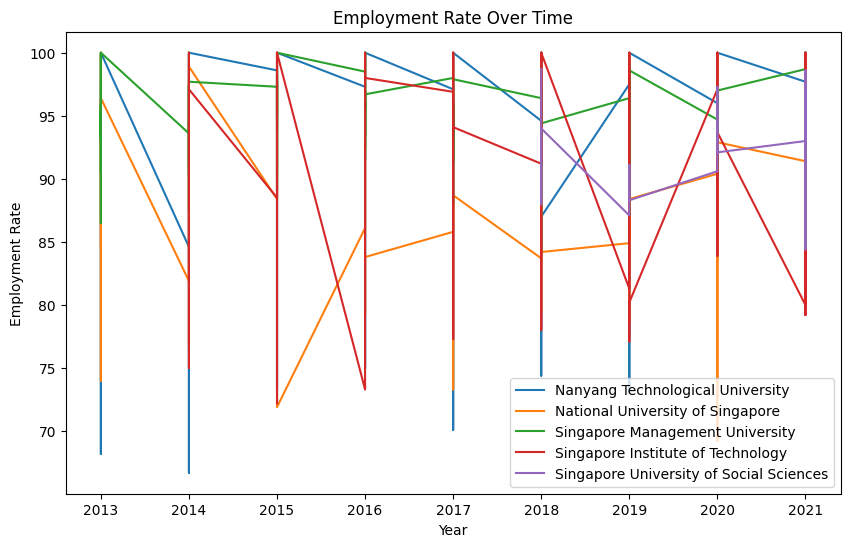

In [123]:
fig, ax = plt.subplots(figsize=(10, 6))

for university in df['university'].unique():
    university_df = df[df['university'] == university]
    ax.plot(university_df['year'], university_df['employment_rate_overall'], label=university)

ax.set_title('Employment Rate Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Employment Rate')
ax.legend()
plt.show()

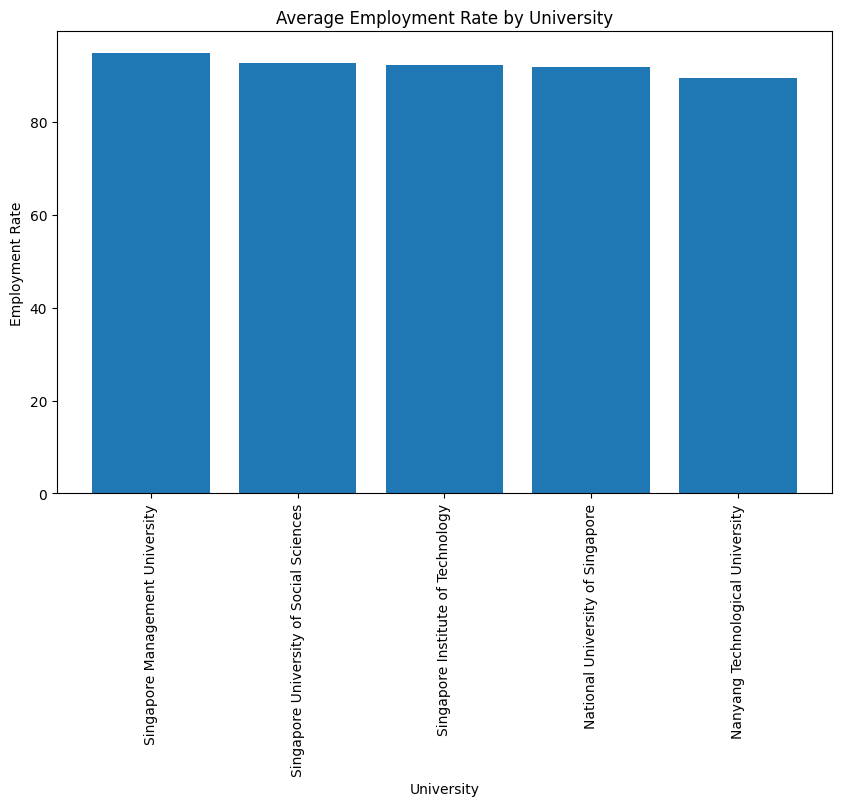

In [124]:
x = df.groupby('university')['employment_rate_overall'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(x.index, x)
plt.xticks(rotation=90)
plt.title('Average Employment Rate by University')
plt.xlabel('University')
plt.ylabel('Employment Rate')
plt.show()

In [125]:
df.to_csv('normal.csv', index=False)

---

# Regressor Model

Here we will be trying out 3 models with and without hyperparameter tuning
1. DecisionTreeRegressor
2. RandomForestRegressor
3. GradientBoostingRegressor
4. DecisionTreeRegressor w/ RandomSearchCV
4. DecisionTreeRegressor w/ GridSearchCV
5. RandomForestRegressor w/ RandomSearchCV
6. RandomForestRegressor w/ GridSearchCV
7. GradientBoostingRegressor w/ RandomSearchCV
7. GradientBoostingRegressor w/ GridSearchCV

### DecisionTreeRegressor

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [127]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['university'] = le.fit_transform(df['university'])
df['school'] = le.fit_transform(df['school'])
df['degree'] = le.fit_transform(df['degree'])

In [126]:
df.to_csv('final.csv', index=False)

In [126]:
X = df[['university', 'school', 'degree']]
y = df['employment_rate_overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [128]:
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = root_mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
print(f'Mean Squared Error: {mse_dtr:.4f}')
print(f'Root Mean Squared Error: {rmse_dtr:.4f}')
print(f'R-squared: {r2_dtr:.4f}')

Mean Squared Error: 34.6073
Root Mean Squared Error: 5.8828
R-squared: 0.2032


---

### RandomForestRegressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
label_encoder = LabelEncoder()
df['university'] = label_encoder.fit_transform(df['university'])
df['school'] = label_encoder.fit_transform(df['school'])
df['degree'] = label_encoder.fit_transform(df['degree'])

In [131]:
X = df[['university', 'school', 'degree']]
y = df['employment_rate_overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [132]:
rf_model = RandomForestRegressor(n_estimators = 50, random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [133]:
y_pred_rf = rf_model.predict(X_test)

In [134]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse_rf:.4f}')
print(f'Root Mean Squared Error: {rmse_rf:.4f}')
print(f'R-squared: {r2_rf:.4f}')

Mean Squared Error: 25.3891
Root Mean Squared Error: 5.0388
R-squared: 0.4267


---

### GraidentBoostingRegressor

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

In [136]:
df.fillna(df.mean(), inplace=True)

label_encoder = LabelEncoder()
df['university'] = label_encoder.fit_transform(df['university'])
df['school'] = label_encoder.fit_transform(df['school'])
df['degree'] = label_encoder.fit_transform(df['degree'])

In [137]:
X = df[['university', 'school', 'degree']]
y = df['employment_rate_overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [139]:
y_pred_gb = gb.predict(X_test)

In [140]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = root_mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_dtr)
print(f'Mean Squared Error: {mse_gb:.4f}')
print(f'Root Mean Squared Error: {rmse_gb:.4f}')
print(f'R-squared: {r2_gb:.4f}')

Mean Squared Error: 29.0128
Root Mean Squared Error: 5.3864
R-squared: 0.3320


---

### DecisionTreeRegressor w/ RandomSearchCV

In [141]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [142]:
dtr = DecisionTreeRegressor(random_state=42)

In [143]:
from scipy.stats import randint as sp_randint

param_dist_rs = {
    'max_depth': sp_randint(1, 20),
    'min_samples_split': sp_randint(2, 50),
    'min_samples_leaf': sp_randint(1, 20),
    'criterion': ['squared_error']
}

In [144]:
rs_dtr = RandomizedSearchCV(estimator=dtr, param_distributions=param_dist_rs, cv=5, scoring='neg_mean_squared_error', verbose=3, n_iter=100)
rs_dtr.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=squared_error, max_depth=13, min_samples_leaf=11, min_samples_split=3;, score=-28.579 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=13, min_samples_leaf=11, min_samples_split=3;, score=-26.461 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=13, min_samples_leaf=11, min_samples_split=3;, score=-29.738 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=13, min_samples_leaf=11, min_samples_split=3;, score=-29.499 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=13, min_samples_leaf=11, min_samples_split=3;, score=-41.547 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=2, min_samples_split=13;, score=-29.945 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=2, min_samples_split=13;, score=-26.489 total time=   0.0s
[CV 3/5] END criterion=squared_error, max

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F6A3ECC770>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F6A34AF3B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F6A318CAA0>},
                   scoring='neg_mean_squared_error', verbose=3)

In [145]:
print("Best hyperparameters for RandomizedSearchCV:", rs_dtr.best_params_)
print("Cross-validation score for RandomizedSearchCV:", np.sqrt(-rs_dtr.best_score_))

Best hyperparameters for RandomizedSearchCV: {'criterion': 'squared_error', 'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 27}
Cross-validation score for RandomizedSearchCV: 5.214145759356108


In [146]:
y_pred_rs_dtr = rs_dtr.predict(X_test)
mse_rs_dtr = mean_squared_error(y_test, y_pred_rs_dtr)
rmse_rs_dtr = root_mean_squared_error(y_test, y_pred_rs_dtr)
r2_rs_dtr = r2_score(y_test, y_pred_rs_dtr)

In [147]:
print(f"Decision Tree Regressor with RandomizedSearchCV\nMSE: {mse_rs_dtr:.2f}\nRMSE: {rmse_rs_dtr:.2f}\nR^2: {r2_rs_dtr:.2f}\n")

Decision Tree Regressor with RandomizedSearchCV
MSE: 27.94
RMSE: 5.29
R^2: 0.36



---

### Decision Tree Regressor with GridSearchCV

In [148]:
from sklearn.model_selection import GridSearchCV

# Define search space
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['squared_error']
}

# Train model
dtr_gs = DecisionTreeRegressor()
dtr_gs_cv = GridSearchCV(dtr_gs, param_grid, cv=5, scoring='neg_mean_squared_error')
dtr_gs_cv.fit(X_train, y_train)

# Evaluate model
y_pred_dtr_gs = dtr_gs_cv.predict(X_test)
mse_dtr_gs = mean_squared_error(y_test, y_pred_dtr_gs)
rmse_dtr_gs = root_mean_squared_error(y_test, y_pred_dtr_gs)
r2_dtr_gs = r2_score(y_test, y_pred_dtr_gs)

print(f"Decision Tree Regressor with GridSearchCV\nMSE: {mse_dtr_gs:.2f}\nRMSE: {rmse_dtr_gs:.2f}\nR^2: {r2_dtr_gs:.2f}\n")

Decision Tree Regressor with GridSearchCV
MSE: 30.93
RMSE: 5.56
R^2: 0.29



### Random Forest Regressor with RandomizedSearchCV

In [149]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': randint(1, X.shape[1])  # X.shape[1] represents the number of features in your dataset
}


# Train model
rfr_rs = RandomForestRegressor()
rfr_rs_cv = RandomizedSearchCV(rfr_rs, param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error')
rfr_rs_cv.fit(X_train, y_train)

# Evaluate model
y_pred_rfr_rs = rfr_rs_cv.predict(X_test)
mse_rfr_rs = mean_squared_error(y_test, y_pred_rfr_rs)
rmse_rfr_rs = root_mean_squared_error(y_test, y_pred_rfr_rs)
r2_rfr_rs = r2_score(y_test, y_pred_rfr_rs)

print(f"Random Forest Regressor with RandomizedSearchCV\nMSE: {mse_rfr_rs:.2f}\nRMSE: {rmse_rfr_rs:.2f}\nR^2: {r2_rfr_rs:.2f}\n")


Random Forest Regressor with RandomizedSearchCV
MSE: 27.43
RMSE: 5.24
R^2: 0.37



---

### Random Forest Regressor with GridSearchCV

In [150]:
# from sklearn.model_selection import GridSearchCV

from scipy.stats import randint

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 10, 20, 30],
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'log2', 'sqrt', None],
    'n_estimators': [10, 50, 100]
}

# Train model
rfr_gs = RandomForestRegressor()
rfr_gs_cv = GridSearchCV(rfr_gs, param_grid, cv=5, scoring='neg_mean_squared_error')
rfr_gs_cv.fit(X_train, y_train)

# Evaluate model
y_pred_rfr_gs = rfr_gs_cv.predict(X_test)
mse_rfr_gs = mean_squared_error(y_test, y_pred_rfr_gs)
rmse_rfr_gs = root_mean_squared_error(y_test, y_pred_rfr_gs)
r2_rfr_gs = r2_score(y_test, y_pred_rfr_gs)

print(f"Random Forest Regressor with GridSearchCV\nMSE: {mse_rfr_gs:.2f}\nRMSE: {rmse_rfr_gs:.2f}\nR^2: {r2_rfr_gs:.2f}\n")


Random Forest Regressor with GridSearchCV
MSE: 27.08
RMSE: 5.20
R^2: 0.38



---

### Gradient Boosting Regressor with RandomizedSearchCV

In [151]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': randint(1, X.shape[1])  # X.shape[1] represents the number of features in your dataset
}

# Train model
gbr_rs = GradientBoostingRegressor()
gbr_rs_cv = RandomizedSearchCV(gbr_rs, param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error')
gbr_rs_cv.fit(X_train, y_train)

# Evaluate model
y_pred_gbr_rs = gbr_rs_cv.predict(X_test)
mse_gbr_rs = mean_squared_error(y_test, y_pred_gbr_rs)
rmse_gbr_rs = mean_squared_error(y_test, y_pred_gbr_rs)
r2_gbr_rs = r2_score(y_test, y_pred_gbr_rs)

print(f"Gradient Boosting Regressor with RandomizedSearchCV\nMSE: {mse_gbr_rs:.2f}\nRMSE: {rmse_gbr_rs:.2f}\nR^2: {r2_gbr_rs:.2f}\n")


Gradient Boosting Regressor with RandomizedSearchCV
MSE: 26.49
RMSE: 26.49
R^2: 0.39



---

### Gradient Boosting Regressor with GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_features': [0.5, 0.75, 1.0]
}

# Train model
gbr_gs = GradientBoostingRegressor()
gbr_gs_cv = GridSearchCV(gbr_gs, param_grid, cv=5, scoring='neg_mean_squared_error')
gbr_gs_cv.fit(X_train, y_train)

# Evaluate model
y_pred_gbr_gs = gbr_gs_cv.predict(X_test)
mse_gbr_gs = mean_squared_error(y_test, y_pred_gbr_gs)
rmse_gbr_gs = root_mean_squared_error(y_test, y_pred_gbr_gs)
r2_gbr_gs = r2_score(y_test, y_pred_gbr_gs)

print(f"Gradient Boosting Regressor with GridSearchCV\nMSE: {mse_gbr_gs:.2f}\nRMSE: {rmse_gbr_gs:.2f}\nR^2: {r2_gbr_gs:.2f}\n")

Gradient Boosting Regressor with GridSearchCV
MSE: 29.11
RMSE: 5.40
R^2: 0.33



In [153]:
r2_list = {"DecisionTreeRegressor": r2_dtr,
          "RandomForestRegressor": r2_rf,
          "GradientBoostingRegressor": r2_gb,
          "DecisionTreeRegressor w/ RandomSearchCV": r2_rs_dtr,
          "DecisionTreeRegressor w/ GridSearchCV": r2_dtr_gs,
          "RandomForestRegressor w/ RandomSearchCV":r2_rfr_rs ,
          "RandomForestRegressor w/ GridSearchCV":r2_rfr_gs ,
          "GradientBoostingRegressor w/ RandomSearchCV": r2_gbr_rs,
          "GradientBoostingRegressor w/ GridSearchCV": r2_gbr_gs}

# mae_list = {"DecisionTreeRegressor": mae_dtr,
#           "RandomForestRegressor": mae_rf ,
#           "GradientBoostingRegressor": mae_gb,
#           "DecisionTreeRegressor w/ RandomSearchCV": mae_rs_dtr,
#           "DecisionTreeRegressor w/ GridSearchCV": mae_dtr_gs,
#           "RandomForestRegressor w/ RandomSearchCV":mae_rfr_rs ,
#           "RandomForestRegressor w/ GridSearchCV":mae_rfr_gs ,
#           "GradientBoostingRegressor w/ RandomSearchCV": mae_gbr_rs,
#           "GradientBoostingRegressor w/ GridSearchCV": mae_gbr_gs}

mse_list = {"DecisionTreeRegressor": mse_dtr,
          "RandomForestRegressor": mse_rf ,
          "GradientBoostingRegressor": mse_gb,
          "DecisionTreeRegressor w/ RandomSearchCV": mse_rs_dtr,
          "DecisionTreeRegressor w/ GridSearchCV": mse_dtr_gs,
          "RandomForestRegressor w/ RandomSearchCV":mse_rfr_rs ,
          "RandomForestRegressor w/ GridSearchCV":mse_rfr_gs ,
          "GradientBoostingRegressor w/ RandomSearchCV": mse_gbr_rs,
          "GradientBoostingRegressor w/ GridSearchCV": mse_gbr_gs}

rmse_list = {"DecisionTreeRegressor": rmse_dtr,
          "RandomForestRegressor": rmse_rf,
          "GradientBoostingRegressor": rmse_gb,
          "DecisionTreeRegressor w/ RandomSearchCV": rmse_rs_dtr,
          "DecisionTreeRegressor w/ GridSearchCV": rmse_dtr_gs,
          "RandomForestRegressor w/ RandomSearchCV": rmse_rfr_rs,
          "RandomForestRegressor w/ GridSearchCV": rmse_rfr_gs,
          "GradientBoostingRegressor w/ RandomSearchCV": rmse_gbr_rs,
          "GradientBoostingRegressor w/ GridSearchCV": rmse_gbr_rs}

In [154]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
# a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [155]:
org = pd.concat([a1, a3, a4], axis = 1)
org

,R2 SCORE,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
DecisionTreeRegressor,0.203157,34.607347,5.882801
RandomForestRegressor,0.426695,25.389127,5.038762
GradientBoostingRegressor,0.331973,29.012792,5.386352
DecisionTreeRegressor w/ RandomSearchCV,0.356740,27.937164,5.285562
DecisionTreeRegressor w/ GridSearchCV,0.287734,30.934103,5.561844
RandomForestRegressor w/ RandomSearchCV,0.368468,27.427775,5.237153
RandomForestRegressor w/ GridSearchCV,0.376440,27.081546,5.203993
GradientBoostingRegressor w/ RandomSearchCV,0.390038,26.490990,26.490990
GradientBoostingRegressor w/ GridSearchCV,0.329642,29.114031,26.490990


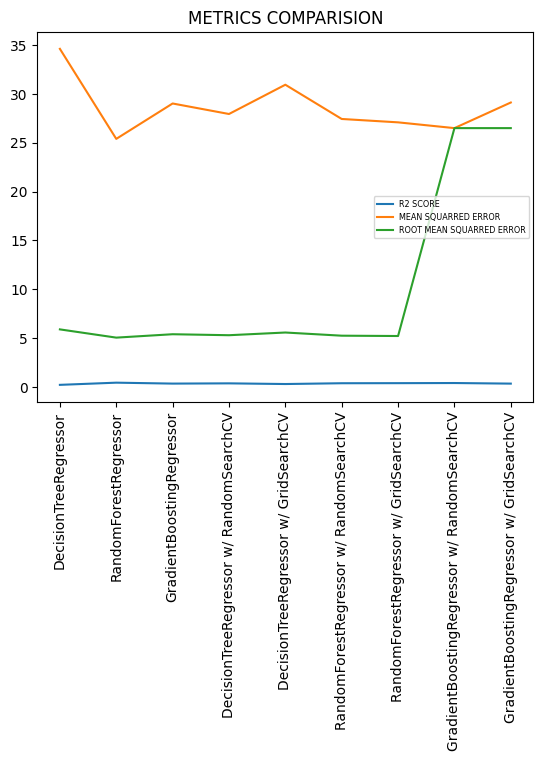

In [156]:
alg = ['DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor w/ RandomSearchCV','DecisionTreeRegressor w/ GridSearchCV','RandomForestRegressor w/ RandomSearchCV', 'RandomForestRegressor w/ GridSearchCV', 'GradientBoostingRegressor w/ RandomSearchCV', 'GradientBoostingRegressor w/ GridSearchCV']
plt.plot(alg,a1)
# plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]
plt.xticks(rotation=90)
plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()